# Import necessary librairies

In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PowerTransformer, RobustScaler, MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV

# Load dataset

In [2]:
path = '../data/loan_approval_dataset.csv'
try:
    loan_data = pd.read_csv(path)
except FileNotFoundError as e:
    print(e)

# Dataset information

# Initial information about the dataset

In [3]:
loan_data.head(7)

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
5,6,0,Graduate,Yes,4800000,13500000,10,319,6800000,8300000,13700000,5100000,Rejected
6,7,5,Graduate,No,8700000,33000000,4,678,22500000,14800000,29200000,4300000,Approved


In [4]:
loan_data = loan_data.drop(['loan_id'], axis=1)

In [5]:
number_rows = loan_data.shape[0]
number_columns = loan_data.shape[1]
total_elements = number_rows * number_columns

print(f"Number of rows: {number_rows}")
print(f"Number of columns: {number_columns}")
print(f"Number of elements: {total_elements}")

Number of rows: 4269
Number of columns: 12
Number of elements: 51228


In [6]:
loan_data.columns = loan_data.columns.str.replace(' ', '')

In [31]:
loan_data.dtypes

no_of_dependents             int64
education                   object
self_employed               object
income_annum                 int64
loan_amount                  int64
loan_term                    int64
cibil_score                  int64
residential_assets_value     int64
commercial_assets_value      int64
luxury_assets_value          int64
bank_asset_value             int64
loan_status                 object
dtype: object

In [7]:
# Différent type dans le dataset
loan_data.dtypes.value_counts()

int64     9
object    3
Name: count, dtype: int64

In [ ]:
loan_data['no_of_dependents'] = loan_data['no_of_dependents'].astype('category')
loan_data['education'] = loan_data['education'].astype('category')
loan_data['self_employed'] = loan_data['self_employed'].astype('category')
loan_data['loan_status'] = loan_data['loan_status'].astype('category')

In [61]:
# Sélection des données numériques
numerical_data = ['income_annum', 'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value', 'commercial_assets_value','luxury_assets_value', 'bank_asset_value']
numerical_data = loan_data[numerical_data]
print("Numerical data: ")
print(numerical_data.columns)

print()

categorical_data = ['no_of_dependents', 'education', 'self_employed', 'loan_status']
categorical_data = loan_data[categorical_data]
print("Categorical data: ")
print(categorical_data.columns)

Numerical data: 
Index(['income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value'],
      dtype='object')

Categorical data: 
Index(['no_of_dependents', 'education', 'self_employed', 'loan_status'], dtype='object')


In [68]:
loan_data.dtypes

no_of_dependents            category
education                   category
self_employed               category
income_annum                   int64
loan_amount                    int64
loan_term                      int64
cibil_score                    int64
residential_assets_value       int64
commercial_assets_value        int64
luxury_assets_value            int64
bank_asset_value               int64
loan_status                 category
dtype: object

In [69]:
# Statistique descriptives
numerical_data.describe().T

,count,mean,std,min,25%,50%,75%,max
income_annum,4269.0,5.059124e+06,2.806840e+06,200000.0,2700000.0,5100000.0,7500000.0,9900000.0
loan_amount,4269.0,1.513345e+07,9.043363e+06,300000.0,7700000.0,14500000.0,21500000.0,39500000.0
loan_term,4269.0,1.090045e+01,5.709187e+00,2.0,6.0,10.0,16.0,20.0
cibil_score,4269.0,5.999361e+02,1.724304e+02,300.0,453.0,600.0,748.0,900.0
residential_assets_value,4269.0,7.472617e+06,6.503637e+06,-100000.0,2200000.0,5600000.0,11300000.0,29100000.0
commercial_assets_value,4269.0,4.973155e+06,4.388966e+06,0.0,1300000.0,3700000.0,7600000.0,19400000.0
luxury_assets_value,4269.0,1.512631e+07,9.103754e+06,300000.0,7500000.0,14600000.0,21700000.0,39200000.0
bank_asset_value,4269.0,4.976692e+06,3.250185e+06,0.0,2300000.0,4600000.0,7100000.0,14700000.0


In [70]:
# Statistiques pour les variables
categorical_data.describe(include=['category']).T

,count,unique,top,freq
no_of_dependents,4269,6,4,752
education,4269,2,Graduate,2144
self_employed,4269,2,Yes,2150
loan_status,4269,2,Approved,2656


In [71]:
# nombre de null dans le dataset
loan_data.isnull().sum()

no_of_dependents            0
education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
loan_status                 0
dtype: int64

# Data exploration (EDA)

# Data visualization

## 1) Graphical analysis

### Leçon: On trace la distribution pour voir si la variable suit une distribution normale ou asymétrique
### Ça sert également à identifier les valeurs abérrantes

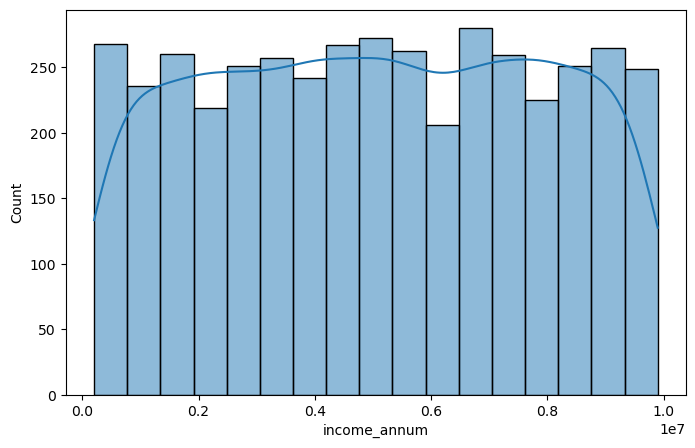

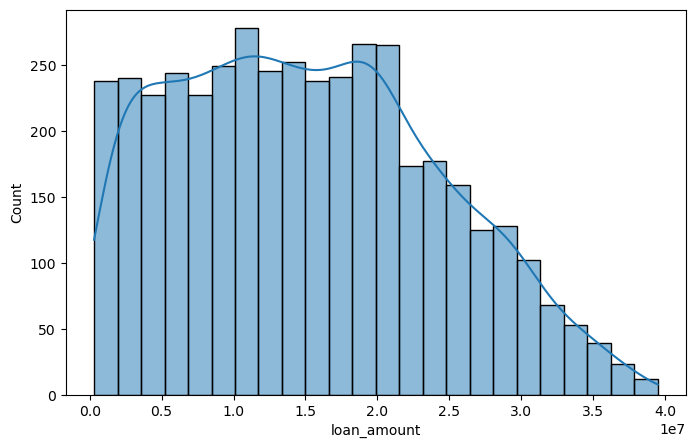

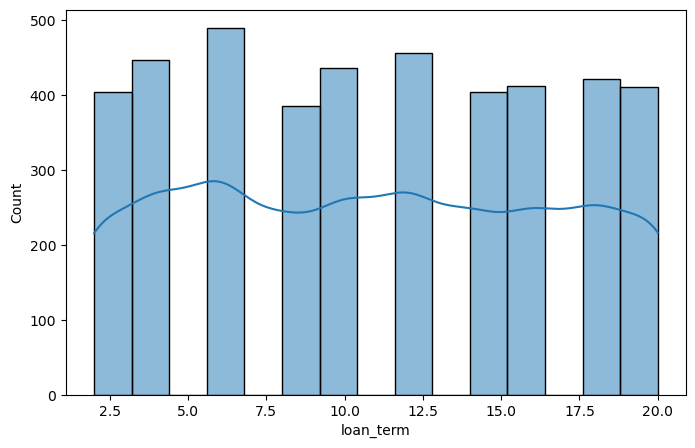

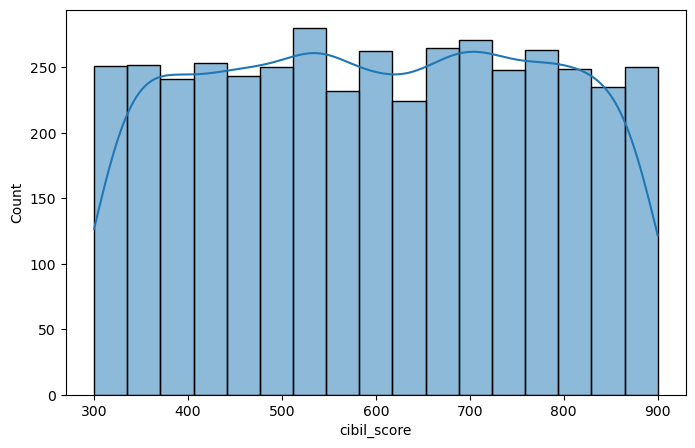

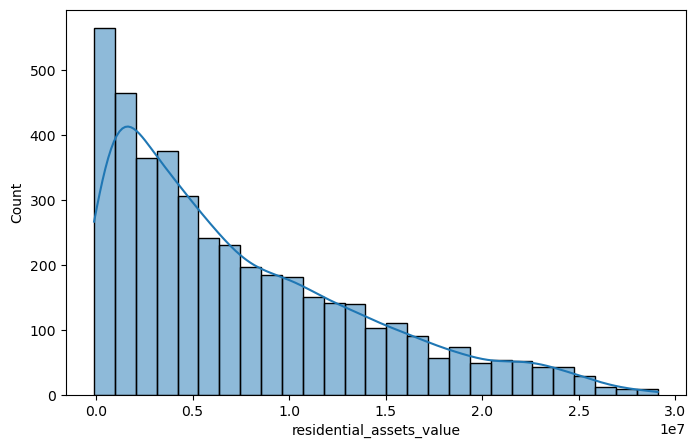

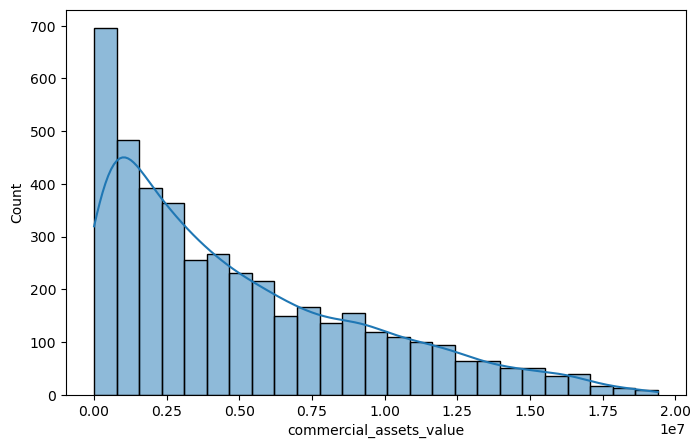

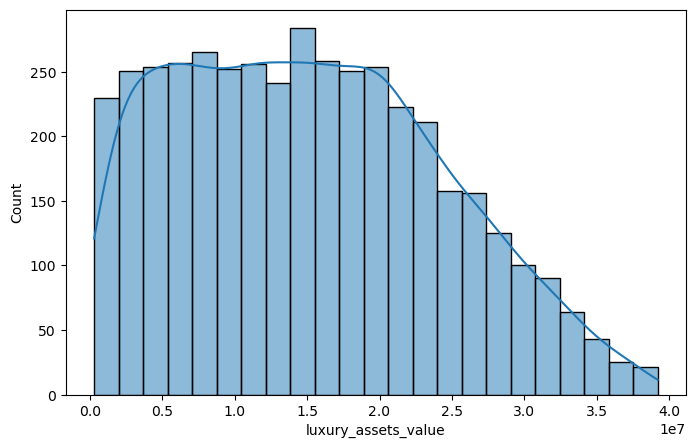

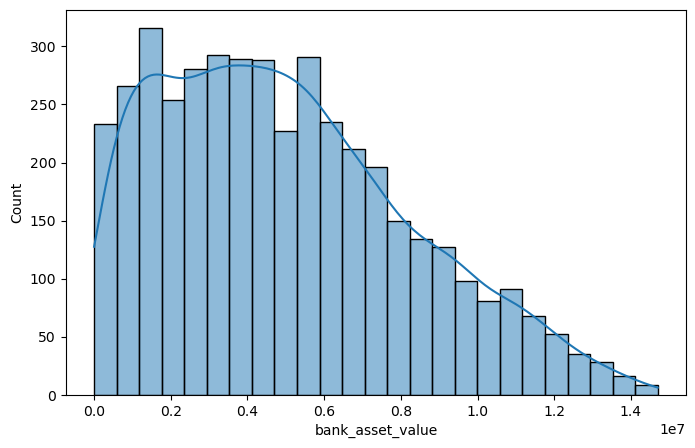

In [72]:
# distribution des variables numériques
for col in loan_data.select_dtypes(include=['int64']):
    plt.figure(figsize=(8, 5))
    sns.histplot(data=loan_data, x=col, kde=True)
    plt.show()
    plt.close()

#### *** Le variables: residential_assets_value, commercial_asset_value, luxury_asset_value, bank_asset_value sont un peu skewé à droite, c'est à dire skewé positivement ***

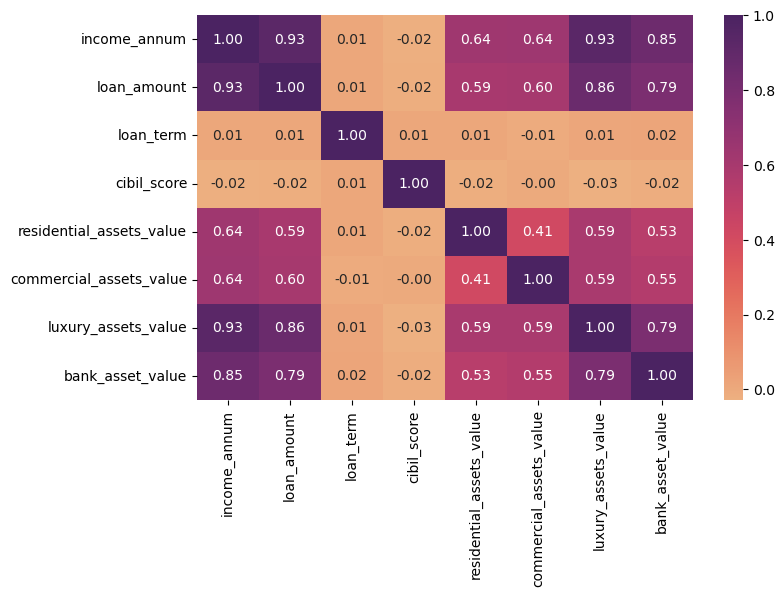

In [73]:
# corrélation entre les variables numériques
loan_corr = numerical_data.corr()

plt.figure(figsize=(8, 5))
sns.heatmap(loan_corr, annot=True, cbar=True, cmap='flare',fmt='.2f')
plt.show()
plt.close()

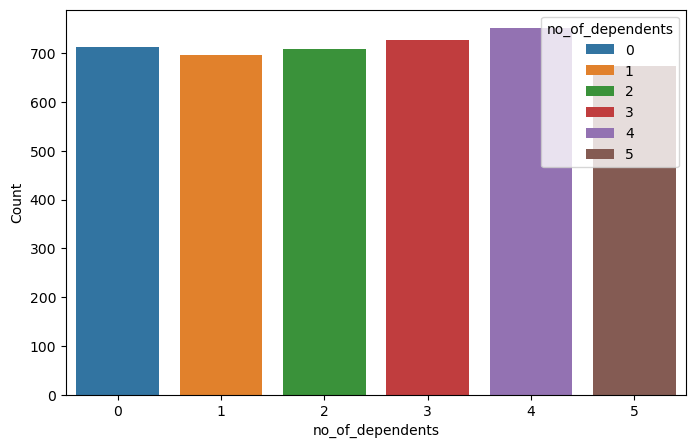

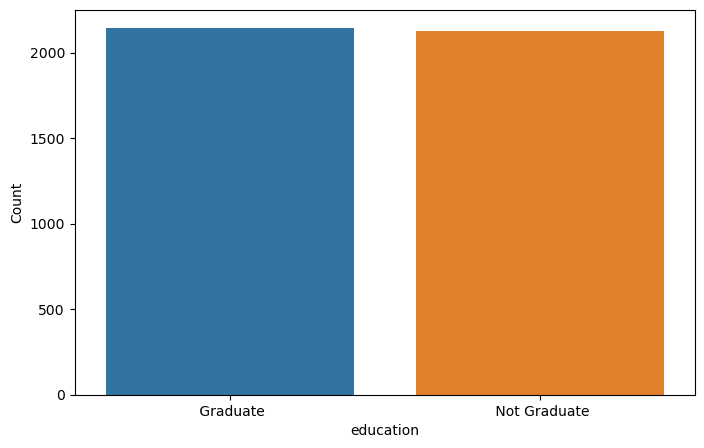

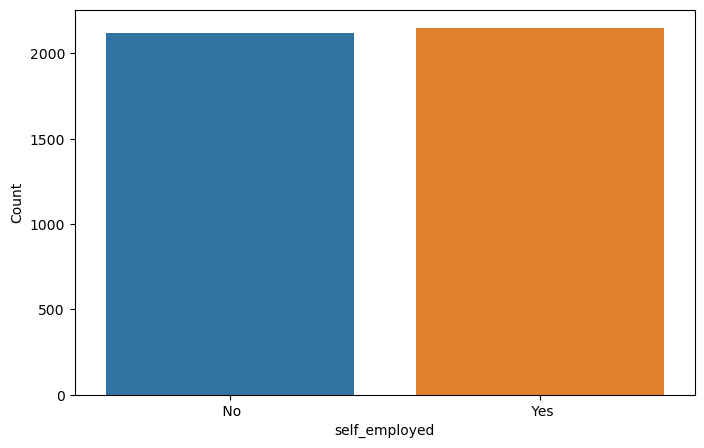

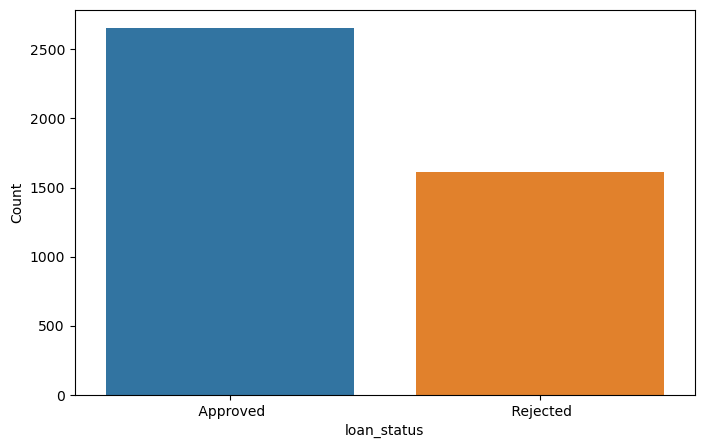

In [74]:
# visualisation des variables catégorielles
for col in categorical_data:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=col, data=categorical_data, hue=col)
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()
    plt.close()

## 2) Distribution categorical data

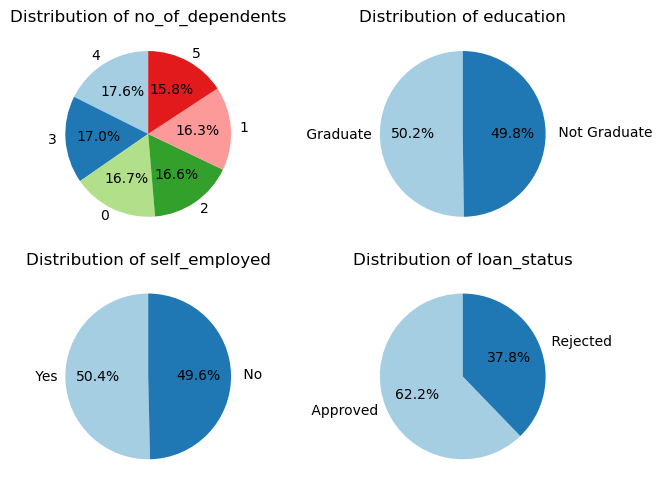

In [75]:
# relation des variables catégorielles avec la variable target
plt.figure(figsize=(7,5))

for i,x in enumerate(categorical_data,1):
    plt.subplot(2,2,i)
    dfpie=loan_data[x].value_counts()
    plt.pie(dfpie, labels=dfpie.index, autopct='%1.1f%%', startangle=90,
            colors=plt.cm.Paired.colors) 

    plt.title(f'Distribution of {x}')

plt.tight_layout()

In [76]:
numerical_data.var()

income_annum                7.878350e+12
loan_amount                 8.178241e+13
loan_term                   3.259482e+01
cibil_score                 2.973224e+04
residential_assets_value    4.229729e+13
commercial_assets_value     1.926302e+13
luxury_assets_value         8.287833e+13
bank_asset_value            1.056370e+13
dtype: float64

## 3) Data relationships analysis

# Data cleaning

## 1) Handling missing values

In [77]:
missing_values = loan_data.isnull().sum().sum()
if missing_values != 0:
    print(f"Number of missing values: {missing_values}")
else:
    print("No missing value")

No missing value


## 3) Handling outliers

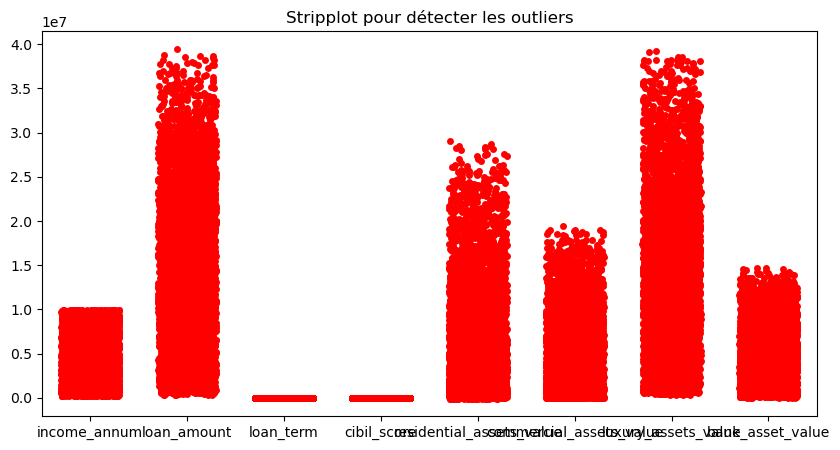

In [78]:
# Exemple de stripplot pour détecter les outliers
plt.figure(figsize=(10, 5))
sns.stripplot(data=numerical_data, jitter=0.3, color="red")
plt.title("Stripplot pour détecter les outliers")
plt.show()

## 4) Handling duplicates

In [79]:
loan_data.duplicated().sum()

0

# Data preprocessing

## 1) Splitting data into "Features" - "Training"

In [80]:
X = loan_data.drop(['loan_status'], axis=1)
y = loan_data['loan_status']

print(X.shape)
print(y.shape)

(4269, 11)
(4269,)


## 2) Encoding X and y

In [81]:
numerical_data.columns

Index(['income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value'],
      dtype='object')

In [83]:
categorical_data = categorical_data[['no_of_dependents', 'education', 'self_employed']]
categorical_data.columns

Index(['no_of_dependents', 'education', 'self_employed'], dtype='object')

## 3) Data Re-scaling and normalizing

In [84]:
X_copy = X.copy()

In [122]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', PowerTransformer(), numerical_data.columns),  # Mise à l'échelle pour les variables numériques
        ('cat', OneHotEncoder(drop='first'), categorical_data.columns)  # Encodage pour les variables catégorielles
    ]
)

# Appliquer le prétraitement
X_preprocessed = preprocessor.fit_transform(X)

In [123]:
X_preprocessed[:5]

array([[ 1.48943103,  1.46070585,  0.26417625,  1.02697115, -0.75159817,
         1.86839096,  0.85332943,  0.94343087,  0.        ,  1.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [-0.24942985, -0.18620655, -0.43156611, -1.0606843 , -0.69627831,
        -0.3725383 , -0.58579857, -0.34938988,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  1.        ,  1.        ],
       [ 1.3450743 ,  1.44472085,  1.48290838, -0.51681973,  0.03189562,
         0.22749429,  1.71145704,  1.90624418,  0.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 1.07985622,  1.52423488, -0.43156611, -0.75219731,  1.58453107,
        -0.05062067,  0.90569654,  0.92069352,  0.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 1.54661903,  0.98720301,  1.48290838, -1.28166497,  0.80469636,
         0.85671392,  1.41057596,  0.18536299, 

In [124]:
y = pd.get_dummies(y, drop_first=True).squeeze()

## 4) Splitting into "Training" - "Testing"

In [125]:
# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)

# Afficher les formes des données
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (3415, 15)
Shape of X_test: (854, 15)
Shape of y_train: (3415,)
Shape of y_test: (854,)


# Model selection

## 1) Importing model for selection process

In [126]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [127]:
FeatureModel = RandomForestClassifier(n_estimators=100, random_state=42)
FeatureModel.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [128]:
FeatureModel.score(X_train, y_train)

1.0

In [138]:
FeatureModel.score(X_test, y_test)
featured_prediction = FeatureModel.predict(X_test)
report_featured = classification_report(y_test, featured_prediction)
print(report_featured)

              precision    recall  f1-score   support

       False       0.97      0.99      0.98       536
        True       0.98      0.95      0.96       318

    accuracy                           0.97       854
   macro avg       0.98      0.97      0.97       854
weighted avg       0.97      0.97      0.97       854



In [130]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train,y_train)
model.score(X_test, y_test)

0.9016393442622951

In [131]:
logistic_prediction=model.predict(X_test)

In [132]:
report = classification_report(y_test, logistic_prediction)
print(report)

              precision    recall  f1-score   support

       False       0.91      0.93      0.92       536
        True       0.88      0.85      0.87       318

    accuracy                           0.90       854
   macro avg       0.90      0.89      0.89       854
weighted avg       0.90      0.90      0.90       854



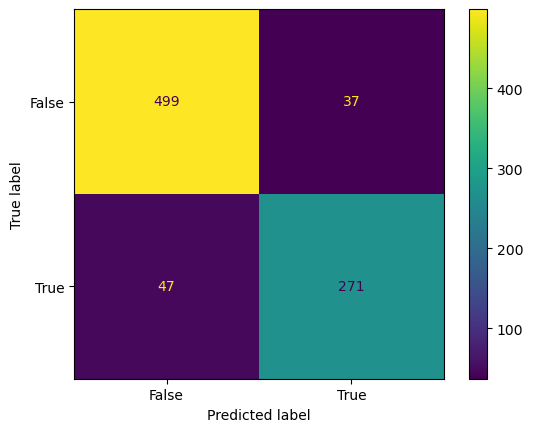

In [133]:
conmax=confusion_matrix(y_test, logistic_prediction)
disp = ConfusionMatrixDisplay(confusion_matrix=conmax,
                              display_labels=model.classes_)
disp.plot()
plt.show()

In [134]:
from sklearn.neighbors import KNeighborsClassifier
parameters = {'n_neighbors':[3,5,6,7,8,9]}

model = KNeighborsClassifier()
clf=GridSearchCV(model,parameters,cv=5,return_train_score=False,scoring='f1')
clf.fit(X_train,y_train)
pd.DataFrame(clf.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.007844,0.002998,0.103747,0.004786,3,{'n_neighbors': 3},0.833652,0.863636,0.878244,0.868885,0.869231,0.862729,0.015278,6
1,0.007023,0.002578,0.111693,0.009718,5,{'n_neighbors': 5},0.876923,0.877863,0.876000,0.877193,0.872510,0.876098,0.001891,3
2,0.004376,0.000497,0.077940,0.021432,6,{'n_neighbors': 6},0.869215,0.860606,0.869198,0.872211,0.854737,0.865193,0.006509,5
3,0.004218,0.000624,0.055290,0.003816,7,{'n_neighbors': 7},0.876190,0.885057,0.895161,0.889320,0.876494,0.884445,0.007353,2
4,0.003734,0.000161,0.057379,0.005953,8,{'n_neighbors': 8},0.861723,0.869048,0.869748,0.888889,0.879346,0.873751,0.009416,4
5,0.003682,0.000040,0.060033,0.010114,9,{'n_neighbors': 9},0.868217,0.882129,0.898785,0.885437,0.889320,0.884778,0.009986,1


In [135]:
clf.best_params_

{'n_neighbors': 9}

In [139]:
model=KNeighborsClassifier(n_neighbors= 9)
model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=9)

In [140]:
model.score(X_train, y_train)
model.score(X_test, y_test)

0.9121779859484778

In [117]:
from sklearn.svm import SVC

model=SVC()
parameter = {'kernel': ['poly','linear','rbf']}
clf=GridSearchCV(model,parameter,cv=5,return_train_score=False,scoring='f1')
clf.fit(X_train,y_train)
pd.DataFrame(clf.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.111061,0.025036,0.015020,0.001336,poly,{'kernel': 'poly'},0.897727,0.904412,0.925430,0.896422,0.909091,0.906616,0.010468,2
1,0.138224,0.041103,0.020567,0.005994,linear,{'kernel': 'linear'},0.891841,0.891344,0.920388,0.904215,0.915709,0.904699,0.011927,3
2,0.145615,0.022235,0.049347,0.005404,rbf,{'kernel': 'rbf'},0.893536,0.894249,0.920078,0.911488,0.927203,0.909311,0.013539,1


In [118]:
clf.best_params_

{'kernel': 'rbf'}

In [119]:
SVCModel = SVC (kernel='rbf')
SVCModel.fit(X_train,y_train)
SVCPredict = SVCModel.predict(X_test)

In [120]:
report=classification_report(y_test, SVCPredict)
print(report)

              precision    recall  f1-score   support

       False       0.96      0.93      0.94       536
        True       0.89      0.93      0.91       318

    accuracy                           0.93       854
   macro avg       0.92      0.93      0.93       854
weighted avg       0.93      0.93      0.93       854



In [121]:
SVCModel.score(X_test, y_test)

0.9297423887587822

## 2) Training the machine learning

# Model evaluation

## 1) Training score

## 2) Testing score

## 3) Choosing the better Model

# Model deployment